In [1]:
# In this analysis, we will be examining deaths by drug overdose and various contributing factors. 
# Data examined includes information from the years 2021-2023 in the United States, for individuals 18 and older.
# The various contributing factors analyzed are High School Graduation Rate, Median Household Income, and Unemployment Rate. 
# These values are averages from 2021-2023. 

In [2]:
# Import modules
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
import hvplot.pandas
import pandas as pd
from pathlib import Path


In [3]:
# Read HS Grad Rate, Median Household Income, Unemployment Rate, and Drug Overdose Rates as CSV files into DataFrames
# Note that these datasets have already been cleaned in separate Notebooks in our Repository. 
# Refer to these folders: **INSERT FOLDERS HERE** to view raw data and cleaning process.
#import HS grad data & create dataframe
hs_grad_data = Path("Resources/Average_HS_Grad_Rates.csv")
hs_grad_df = pd.read_csv(hs_grad_data)
#import median income data & create dataframe
income_data = Path("Median Household Income.csv")
income_df = pd.read_csv(income_data)
#import unemployment data & create dataframe
unemployment_data = Path("unemployment_rate_by_state_2021_2023.csv")
unemployment_df = pd.read_csv(unemployment_data)
#import overdose data & create dataframe
overdose_data = Path ("average_deaths_df.csv")
overdose_df = pd.read_csv(overdose_data)
#import state geographic data & create dataframe
state_geo_data = Path("Resources/state_lat_lon.csv")
state_geo_df = pd.read_csv(state_geo_data)
state_geo_df.head()


,Unnamed: 0,State name,lat,lon,correct lon
0,0,Alabama,32.7794,-86.8287,86.8287
1,1,Alaska,64.0685,-152.2782,152.2782
2,2,Arizona,34.2744,-111.6602,111.6602
3,3,Arkansas,34.8938,-92.4426,92.4426
4,4,California,37.1841,-119.4696,119.4696


In [4]:
### clean dataframes to only include necessary columns
#HS graduation rates cleaned df
hs_grad_final_df = hs_grad_df[["State name", "Average High School Graduation Rate (2021-2023)", "Average Population (2021-2023)"]]
#unemployment rates cleaned df
unemployment_final_df = unemployment_df[["State name", "21-23 Avg Unemp Rate"]]
#overdose rates cleaned df
overdose_final_df = overdose_df[["State Name", "Average Deaths by OD"]]
overdoses_final_df = overdose_final_df.rename(columns={"State Name":"State name"})
#states geographical data rates cleaned df
state_geo_final_df = state_geo_df[["State name", "lat", "correct lon"]]
states_geo_final_df = state_geo_final_df.rename(columns={"lat":"Latitude", "correct lon":"Longitude"})


In [5]:
# Merge overdose and states geographic DataFrame on "State name"
overdose_states_geo_df = overdoses_final_df.merge(states_geo_final_df, how="inner", on="State name")
overdose_states_geo_df.head()

,State name,Average Deaths by OD,Latitude,Longitude
0,Alabama,1461.000000,32.7794,86.8287
1,Alaska,286.333333,64.0685,152.2782
2,Arizona,2745.666667,34.2744,111.6602
3,Arkansas,578.333333,34.8938,92.4426
4,California,11842.000000,37.1841,119.4696


In [6]:
# Merge overdose, states geographic data with HS grad data on "State name"
overdose_geo_HS_df = overdose_states_geo_df.merge(hs_grad_final_df, how="inner", on="State name")

overdose_geo_HS_df["Average rate of Deaths by OD"] = round((overdose_geo_HS_df["Average Deaths by OD"] / overdose_geo_HS_df['Average Population (2021-2023)']) * 100,4)

overdose_geo_HS_df.head()

,State name,Average Deaths by OD,Latitude,Longitude,Average High School Graduation Rate (2021-2023),Average Population (2021-2023),Average rate of Deaths by OD
0,Alabama,1461.000000,32.7794,86.8287,88.08,3954008,0.0369
1,Alaska,286.333333,64.0685,152.2782,92.60,556716,0.0514
2,Arizona,2745.666667,34.2744,111.6602,88.60,5761630,0.0477
3,Arkansas,578.333333,34.8938,92.4426,88.74,2346215,0.0246
4,California,11842.000000,37.1841,119.4696,85.24,30508752,0.0388


In [7]:
# Merge overdose, state geographic data, HS graduation, with unemployment data on "State name"
overdose_geo_HS_unemp_df = overdose_geo_HS_df.merge(unemployment_final_df, how="inner", on="State name")
overdose_geo_HS_unemp_df.head()

,State name,Average Deaths by OD,Latitude,Longitude,Average High School Graduation Rate (2021-2023),Average Population (2021-2023),Average rate of Deaths by OD,21-23 Avg Unemp Rate
0,Alabama,1461.000000,32.7794,86.8287,88.08,3954008,0.0369,2.638538
1,Alaska,286.333333,64.0685,152.2782,92.60,556716,0.0514,2.299195
2,Arizona,2745.666667,34.2744,111.6602,88.60,5761630,0.0477,3.912461
3,Arkansas,578.333333,34.8938,92.4426,88.74,2346215,0.0246,2.876260
4,California,11842.000000,37.1841,119.4696,85.24,30508752,0.0388,2.740597


In [8]:
# Merge overdose, state geographic data, HS graduation, unemployment data with median income on "State name"
deaths_by_OD_factors_df = overdose_geo_HS_unemp_df.merge(income_df,how="inner",on="State name")

deaths_by_OD_factors_df.head()

,State name,Average Deaths by OD,Latitude,Longitude,Average High School Graduation Rate (2021-2023),Average Population (2021-2023),Average rate of Deaths by OD,21-23 Avg Unemp Rate,2021 Median Household Income,2022 Median Household Income,2023 Median Household Income,Average
0,Alabama,1461.000000,32.7794,86.8287,88.08,3954008,0.0369,2.638538,53913,59674,62212,58599.666667
1,Alaska,286.333333,64.0685,152.2782,92.60,556716,0.0514,2.299195,77845,88121,86631,84199.000000
2,Arizona,2745.666667,34.2744,111.6602,88.60,5761630,0.0477,3.912461,69056,74568,77315,73646.333333
3,Arkansas,578.333333,34.8938,92.4426,88.74,2346215,0.0246,2.876260,52528,55432,58700,55553.333333
4,California,11842.000000,37.1841,119.4696,85.24,30508752,0.0388,2.740597,84907,91551,95521,90659.666667


In [14]:
#Rename median income average and remove unneccessary rows
deaths_by_OD_factors_df = deaths_by_OD_factors_df.rename(columns={"Average rate of Deaths by OD":"Average OD Death Rate (2021-2023)","21-23 Avg Unemp Rate":"Average Unemployment Rate (2021-2023)","Average":"Average Median Household Income (2021-2023)"})
OD_factors_final_df = deaths_by_OD_factors_df[["State name", "Latitude", "Longitude", "Average Population (2021-2023)", "Average Deaths by OD","Average OD Death Rate (2021-2023)", "Average High School Graduation Rate (2021-2023)", "Average Unemployment Rate (2021-2023)", "Average Median Household Income (2021-2023)"]]
OD_factors_final_df.head()

,State name,Latitude,Longitude,Average Population (2021-2023),Average Deaths by OD,Average OD Death Rate (2021-2023),Average High School Graduation Rate (2021-2023),Average Unemployment Rate (2021-2023),Average Median Household Income (2021-2023)
0,Alabama,32.7794,86.8287,3954008,1461.000000,0.0369,88.08,2.638538,58599.666667
1,Alaska,64.0685,152.2782,556716,286.333333,0.0514,92.60,2.299195,84199.000000
2,Arizona,34.2744,111.6602,5761630,2745.666667,0.0477,88.60,3.912461,73646.333333
3,Arkansas,34.8938,92.4426,2346215,578.333333,0.0246,88.74,2.876260,55553.333333
4,California,37.1841,119.4696,30508752,11842.000000,0.0388,85.24,2.740597,90659.666667


In [51]:
# Drop any rows with N/A values - Puerto Rico, District of Columbia may not be needed? 
OD_factors_final_df.dropna(how="any")
OD_factors_final_df

,State name,Latitude,Longitude,Average Population (2021-2023),Average Deaths by OD,Average OD Death Rate (2021-2023),Average High School Graduation Rate (2021-2023),Average Unemployment Rate (2021-2023),Average Median Household Income (2021-2023)
0,Alabama,32.7794,86.8287,3954008,1461.000000,0.0369,88.08,2.638538,58599.666667
1,Alaska,64.0685,152.2782,556716,286.333333,0.0514,92.60,2.299195,84199.000000
2,Arizona,34.2744,111.6602,5761630,2745.666667,0.0477,88.60,3.912461,73646.333333
3,Arkansas,34.8938,92.4426,2346215,578.333333,0.0246,88.74,2.876260,55553.333333
4,California,37.1841,119.4696,30508752,11842.000000,0.0388,85.24,2.740597,90659.666667
5,Colorado,38.9972,105.5478,4621961,1899.666667,0.0411,92.11,4.037969,88155.666667
6,Connecticut,41.6219,72.7273,2889563,1456.000000,0.0504,91.21,2.840842,87955.000000
7,Delaware,38.9896,75.5050,808333,524.333333,0.0649,91.12,3.500364,78208.666667
8,District of Columbia,38.9101,77.0147,548108,583.666667,0.1065,93.06,2.704639,99775.000000
9,Florida,28.6305,82.4497,17891648,7795.333333,0.0436,89.56,4.382576,68558.666667


In [44]:
#create a function for making scatterplots and linear regression lines
def linear_reg(df, x_col, y_col, color):
    
    #create scatterplot
    plt.scatter(df[x_col], df[y_col], facecolor=color, edgecolor=color, label = "Data Points")
    
    #add lables
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f"Plot and Linear Regression of {x_col} and {y_col}")

    
    #perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(df[x_col], df[y_col])
    regression_line = (slope * df[x_col]) + intercept
    
    #create regression line
    plt.plot(df[x_col], regression_line, color = "darkgrey", label = "Regression Line")

    #show 
    plt.legend()
    plt.show
    #print r-value
    print(f"The linear regression has a r-value correlation of {round(r_value,3)}.")

The linear regression has a r-value correlation of -0.117.


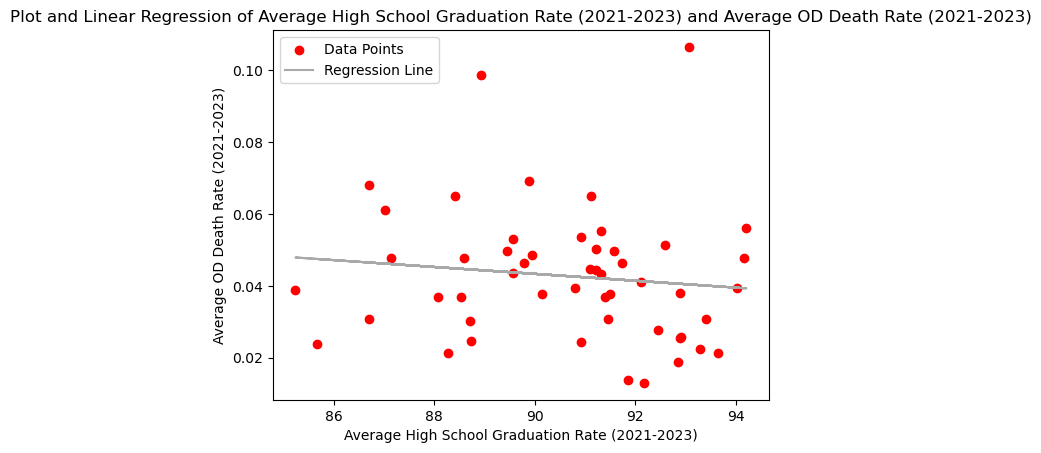

In [45]:
# Start Caluclations
# Q1: How does education rates (high school graduation) affect overdose rates by county across different regional areas in the US?
# graph: each state as a data point on a scatterplot comparing HS graduation rate to drug overdose rate, with a regression line) 

# Plot HS Grad Rates vs Drug Overdose Rates on Scatter Plot
linear_reg(OD_factors_final_df, "Average High School Graduation Rate (2021-2023)", "Average OD Death Rate (2021-2023)", "red")

In [13]:
# Export graph as jpeg for use in presentation


In [14]:
# In Markdown below, discuss relationship between HS Grad Rates and Drug Overdose Rates

Add Discussion here. 

The linear regression has a r-value correlation of 0.01.


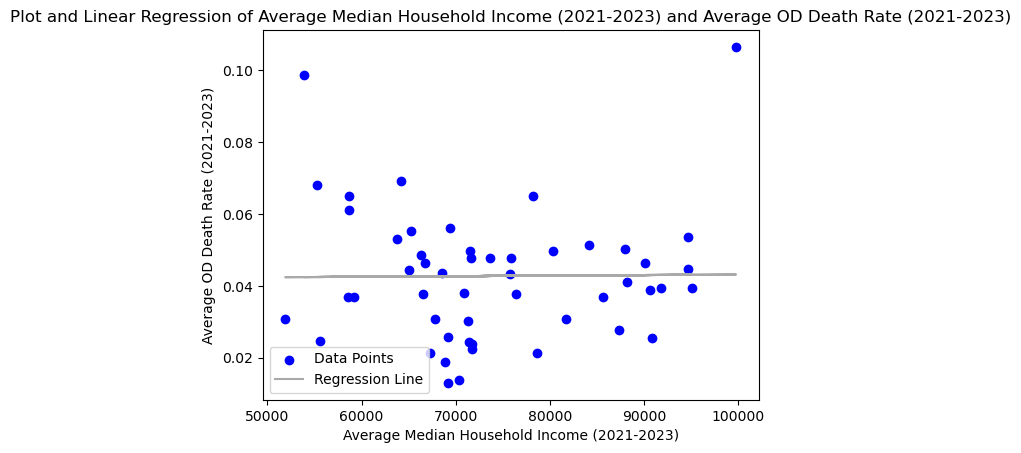

In [47]:
# Q2: Is there a link between socioeconomic status (household median income) and rate of overdoses? 
# graph: each state as a data point on a scatter plot comparing household mean income to drug overdose rate, with regression line


# Plot Median Household Income vs Drug Overdose Rates on Scatter Plot
linear_reg(OD_factors_final_df, "Average Median Household Income (2021-2023)", "Average OD Death Rate (2021-2023)", "blue")


In [16]:
# Add Linear Regression Equation and Line to Plot, as well as r-squared value 


# Export graph as jpeg for use in presentation

In [17]:
# In markdown below, discuss relationship between Median Household Income and Drug Overdose Rates

Add Discussion here. 

The linear regression has a r-value correlation of 0.093.


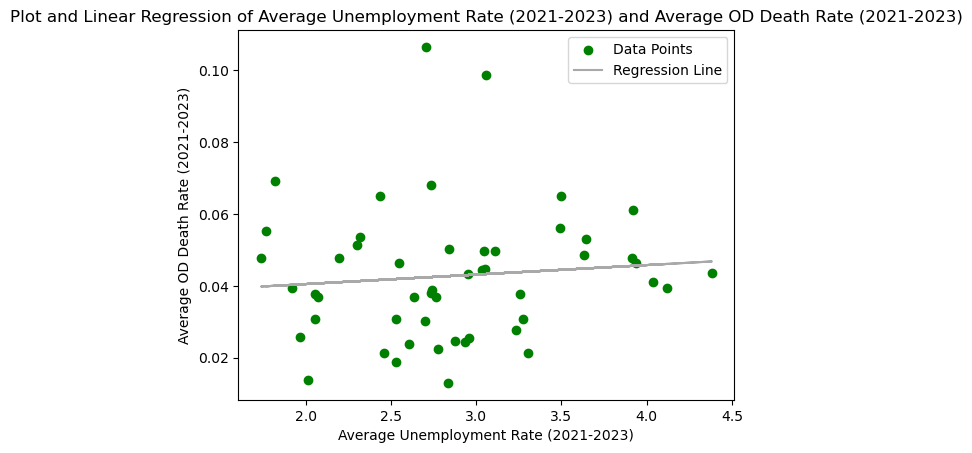

In [49]:
# Q3: Does unemployment rate affect rates of drug overdose by state? 
# graph: each state as a data point on a scatter plot comparing unemployment rate to drug overdose rate, with regression line


# Plot Unemployment Rate vs Drug Overdose Rates on Scatter Plot
linear_reg(OD_factors_final_df, "Average Unemployment Rate (2021-2023)", "Average OD Death Rate (2021-2023)", "green")


In [19]:
# Add Linear Regression Equation and Line to Plot, as well as r-squared value 


# Export graph as jpeg for use in presentation

In [20]:
# In markdown below, discuss relationship between Unemployment Rate and Drug Overdose Rates

Add Discussion here. 

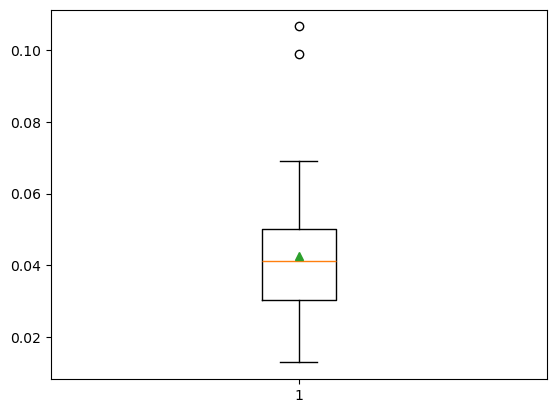

In [50]:
# Statistical Calculations: 

# Create a Boxplot of all States Average Overdose Rate. 
plt.boxplot(OD_factors_final_df["Average OD Death Rate (2021-2023)"], showmeans=True)
plt.show()
# Calculate Quartiles

In [22]:
# Use Quartiles calculates above along with contributing factor (income, unemployment, grad rate) found to have strongest
# correlation to Overdose Rates to make 4 boxplots (side by side)


# Perform ANOVA test on boxplots to determine if there is a significant difference between the 4 quartiles


# Export graph as jpeg for use in presentation

In [23]:
# In markdown below, discuss ANOVA test and the quartiles created

Add Discusssion here. 

In [24]:
# For Presentation, create map of all 50 states, using Drug Overdose Rate for the "size"


# Export graph as jpeg for use in presentation

In [25]:
# In markdown below, add summary of project and discuss and further observations from analysis. 